## **Cartopy**で日本地図書いてみる。

Cartopyとは、地図描画用のツールを提供するPythonライブラリ。

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.path as mpath
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

・PlateCarree():正距円筒図法 ←cartopyデフォルト  
・LambertConformal():ランベルト正積図法  

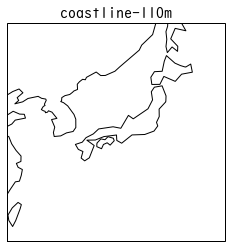

In [2]:
plt.figure(figsize=(4,4))
proj= ccrs.PlateCarree()

ax = plt.axes(projection=proj)

#110m
ax.coastlines(resolution='110m')
ax.set_extent([120,150,20,50], proj)
ax.set_title('coastline-110m', fontsize=16)
plt.show()

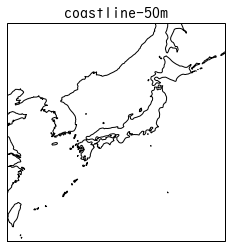

In [3]:
plt.figure(figsize=(4,4))
proj= ccrs.PlateCarree()

ax = plt.axes(projection=proj)

#50m
ax.coastlines(resolution='50m')
ax.set_extent([120,150,20,50], proj)
ax.set_title('coastline-50m', fontsize=16)
plt.show()

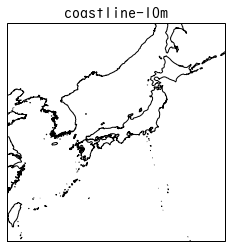

In [4]:
plt.figure(figsize=(4,4))
proj= ccrs.PlateCarree()

ax = plt.axes(projection=proj)

#10m
ax.coastlines(resolution='10m')
ax.set_extent([120,150,20,50], proj)
ax.set_title('coastline-10m', fontsize=16)
plt.show()

## subplotで出力

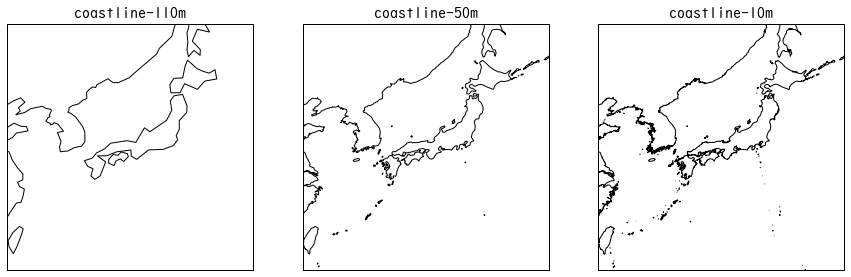

In [5]:
plt.figure(figsize=(15,5))
proj= ccrs.PlateCarree()

#110m
ax = plt.subplot(1,3,1, projection=proj)
ax.coastlines(resolution='110m')
ax.set_extent([120,150,20,50], proj)
ax.set_title('coastline-110m', fontsize=16)

#50m
ax = plt.subplot(1,3,2, projection=proj)
ax.coastlines(resolution='50m')
ax.set_extent([120,150,20,50], proj)
ax.set_title('coastline-50m', fontsize=16)

#10m
ax = plt.subplot(1,3,3, projection=proj)
ax.coastlines(resolution='10m')
ax.set_extent([120,150,20,50], proj)
ax.set_title('coastline-10m', fontsize=16)

plt.show()

### ちなみに**ランベルト**も

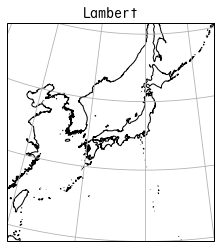

In [6]:
plt.figure(figsize=(4,4))
proj2 = ccrs.LambertConformal(central_longitude=140.0,central_latitude=30,standard_parallels=(30,60))
ax2 = plt.axes(projection=proj2)

ax2.set_extent([120,150,20,50],ccrs.PlateCarree())
ax2.coastlines(resolution='10m')
ax2.gridlines(xlocs=mticker.MultipleLocator(10), ylocs=mticker.MultipleLocator(10))
ax2.set_title('Lambert', fontsize=16)
plt.show()

## **ポーラーステレオ図法(北半球)**

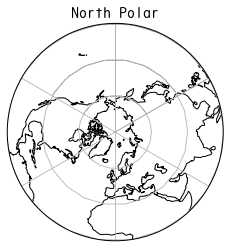

In [7]:
#ポーラーステレオ図法の作図の設定
pol = np.linspace(0,2*np.pi,100)
center, radius = [0.5,0.5], 0.5
ver = np.vstack([np.sin(pol), np.cos(pol)]).T
circle = mpath.Path(ver * radius + center)
proj3 = ccrs.AzimuthalEquidistant(central_longitude=0, central_latitude=90)

plt.figure(figsize=(4,4))
ax3 = plt.axes(projection=proj3)

ax3.set_extent([-180,180,0,90], proj)
ax3.coastlines(resolution='110m')
ax3.gridlines(xlocs=mticker.MultipleLocator(60), ylocs=mticker.MultipleLocator(30))
ax3.set_boundary(circle, transform=ax3.transAxes)
ax3.set_title('North Polar', fontsize=16)

plt.show()

## **ポーラーステレオ図法(南半球)**

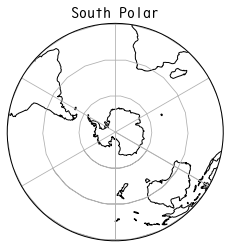

In [8]:
proj4 = ccrs.AzimuthalEquidistant(central_longitude=0, central_latitude=-90)

plt.figure(figsize=(4,4))
ax4 = plt.axes(projection=proj4)

ax4.set_extent([-180,180,-90,0], proj)
ax4.coastlines(resolution='110m')
ax4.gridlines(xlocs=mticker.MultipleLocator(60), ylocs=mticker.MultipleLocator(30))
ax4.set_boundary(circle, transform=ax4.transAxes)
ax4.set_title('South Polar', fontsize=16)

plt.show()

### こちらもsubplotで

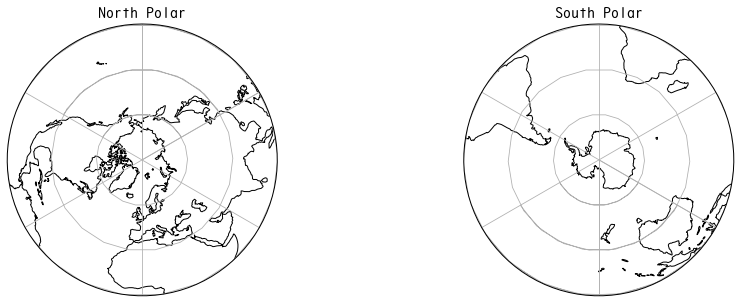

In [9]:
plt.figure(figsize=(15,5))

pol = np.linspace(0,2*np.pi,100)
center, radius = [0.5,0.5], 0.5
ver = np.vstack([np.sin(pol), np.cos(pol)]).T
circle = mpath.Path(ver * radius + center)
proj3 = ccrs.AzimuthalEquidistant(central_longitude=0, central_latitude=90)
proj4 = ccrs.AzimuthalEquidistant(central_longitude=0, central_latitude=-90)

ax3 = plt.subplot(1,2,1, projection=proj3)
ax3.set_extent([-180,180,0,90], proj)
ax3.coastlines(resolution='110m')
ax3.gridlines(xlocs=mticker.MultipleLocator(60), ylocs=mticker.MultipleLocator(30))
ax3.set_boundary(circle, transform=ax3.transAxes)
ax3.set_title('North Polar', fontsize=16)

ax4 = plt.subplot(1,2,2, projection=proj4)
ax4.set_extent([-180,180,-90,0], proj)
ax4.coastlines(resolution='110m')
ax4.gridlines(xlocs=mticker.MultipleLocator(60), ylocs=mticker.MultipleLocator(30))
ax4.set_boundary(circle, transform=ax4.transAxes)
ax4.set_title('South Polar', fontsize=16)

plt.show()

cartopy色塗りしてみる。

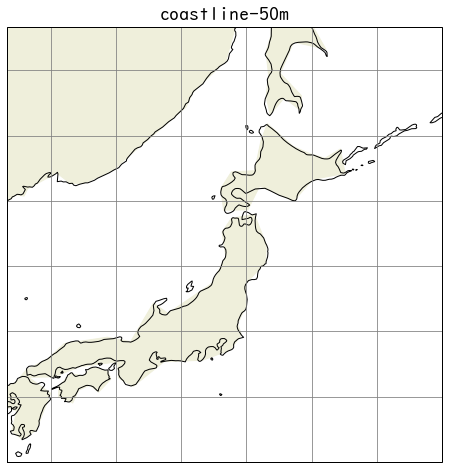

In [10]:
plt.figure(figsize=(8,8))
proj= ccrs.PlateCarree()

ax = plt.axes(projection=proj)

#50m
ax.coastlines(resolution='50m')
ax.set_extent([130,150,30,50], proj)
ax.add_feature(cfeature.LAND)
ax.gridlines(linestyle='-', color='gray')
ax.set_title('coastline-50m', fontsize=20)
plt.show()

なんかはみ出てる

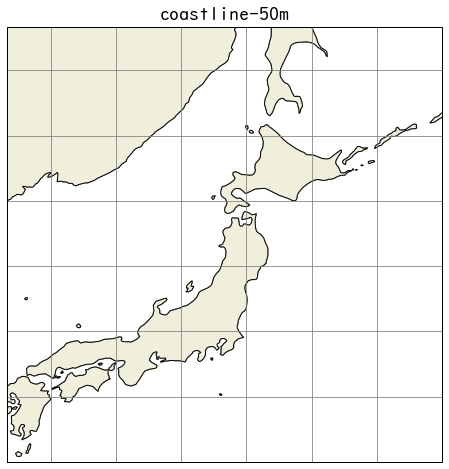

In [11]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',edgecolor='face',facecolor=cfeature.COLORS['land'])
plt.figure(figsize=(8,8))
proj= ccrs.PlateCarree()

ax = plt.axes(projection=proj)

#50m
ax.coastlines(resolution='50m')
ax.set_extent([130,150,30,50], proj)
ax.add_feature(land_50m)
ax.coastlines(resolution='50m', color='black')
ax.gridlines(linestyle='-', color='gray')
ax.set_title('coastline-50m', fontsize=20)
plt.show()

よくなった

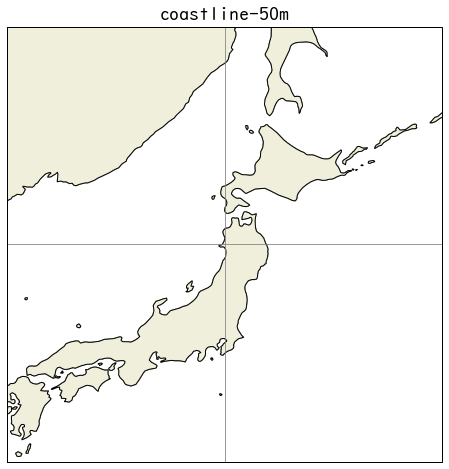

In [12]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])
plt.figure(figsize=(8,8))
proj= ccrs.PlateCarree()

ax = plt.axes(projection=proj)

#50m
ax.coastlines(resolution='50m')
ax.set_extent([130,150,30,50], proj)
ax.add_feature(land_50m)
ax.coastlines(resolution='50m', color='black')
ax.gridlines(linestyle='-', color='gray',xlocs=mticker.MultipleLocator(10), ylocs=mticker.MultipleLocator(10))
ax.set_title('coastline-50m', fontsize=20)
plt.show()

ん？

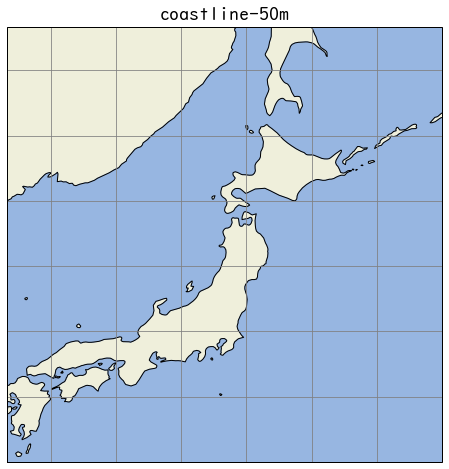

In [13]:
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor=cfeature.COLORS['water'])
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',edgecolor='face',facecolor=cfeature.COLORS['land'])
plt.figure(figsize=(8,8))
proj= ccrs.PlateCarree()

ax = plt.axes(projection=proj)

#50m
ax.coastlines(resolution='50m')
ax.set_extent([130,150,30,50], proj)
ax.add_feature(land_50m)
ax.add_feature(ocean_50m)
ax.coastlines(resolution='50m', color='black')
ax.gridlines(linestyle='-', color='gray')
ax.set_title('coastline-50m', fontsize=20)
plt.show()

海が青くなった～！

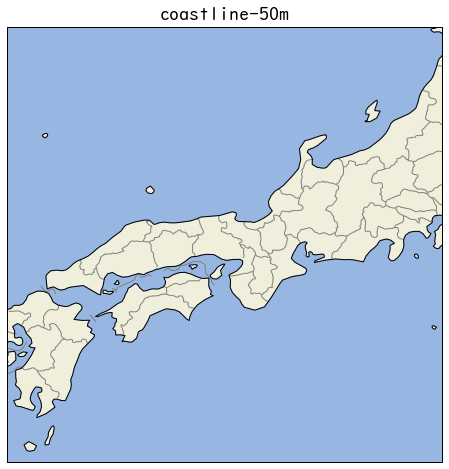

In [14]:
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', 
                                         facecolor=cfeature.COLORS['water'])
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])
states_10m  = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines', '10m', 
                                           edgecolor='gray',
                                           facecolor='none') 
plt.figure(figsize=(8,8))
proj= ccrs.PlateCarree()
ax = plt.axes(projection=proj)

#50m
ax.coastlines(resolution='50m')
ax.set_extent([130, 140, 30, 40], proj)
ax.add_feature(land_50m)
ax.add_feature(ocean_50m)
ax.add_feature(states_10m)
ax.coastlines(resolution='50m', color='black')
ax.set_title('coastline-50m', fontsize=20)
plt.show()

県境引けた～！

cartopyにはNatural Earthで公開されているshapeファイルデータを使うためのモジュールが実装されている。  
cartopy.feature.NaturalEarthFeatureを使うと、NaturalEarthのデータをダウンロードしてポリゴンを作ることができる。

## **ランベルト正角円錐図法**(LambertConformal)

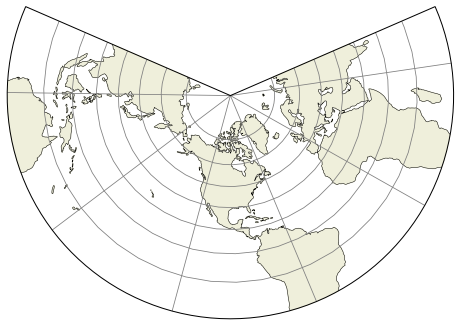

In [15]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.add_feature(cfeature.LAND)
ax.coastlines(lw=0.5)
ax.gridlines(linestyle='-', color='gray')
plt.show()

## **メルカトル図法**(Mercator)

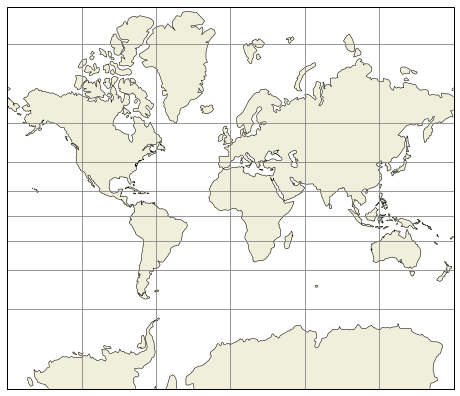

In [16]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.Mercator())
ax.add_feature(cfeature.LAND)
ax.coastlines(lw=0.5)
ax.gridlines(linestyle='-', color='gray')
plt.show()

## **正射方位図法**(Orthographic)

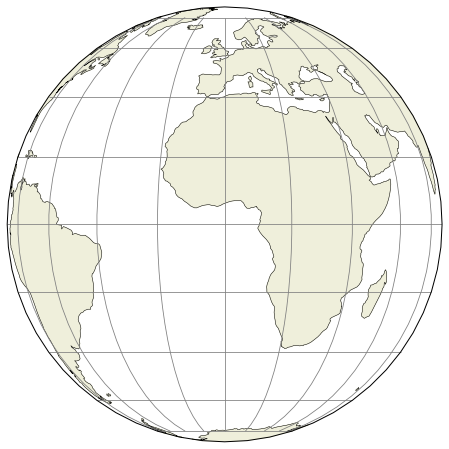

In [17]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.Orthographic())
ax.add_feature(cfeature.LAND)
ax.coastlines(lw=0.5)
ax.gridlines(linestyle='-', color='gray')
plt.show()